##                          Caso Estudio
### 🎯 Propósito del caso

El presente caso tiene como propósito **analizar los factores que influyen en la aprobación o rechazo de créditos hipotecarios** otorgados por una entidad financiera.

### 🧩 Objetivo principal

Identificar los **determinantes socioeconómicos y financieros** que más impactan en la decisión crediticia, con el fin de **optimizar las políticas de evaluación** y **reducir el riesgo crediticio**.


## 🎯 Objetivos Específicos

- **Realizar un Análisis Exploratorio de Datos (EDA):**  
  Comprender el comportamiento de las variables y su relación con la aprobación de préstamos.

- **Detectar valores atípicos y datos faltantes:**  
  Aplicar técnicas adecuadas de imputación y tratamiento para mejorar la calidad de los datos.

- **Analizar la correlación y asociación:**  
  Evaluar las relaciones entre variables numéricas y categóricas para identificar patrones significativos.

- **Determinar las variables con mayor poder explicativo:**  
  Identificar los factores más relevantes sobre la variable objetivo **`EstadoPrestamo`**.

- **Preparar el dataset:**  
  Dejar los datos listos para su uso en un **modelo predictivo supervisado**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import kurtosis, skew
from scipy.stats import pearsonr

In [ ]:
PATH = "drive/MyDrive/aprendizaje automatico iv/trabajo_integrador/"
os.listdir(PATH)

['Enunciado-Primer-Caso-Integrador.pdf',
 'CasoEstudio_N°07.pdf',
 'AdquisicionCreditoHipotecario.csv',
 'preguntas.gdoc',
 'trabajo_integrador.ipynb']

In [ ]:
# df = pd.read_csv(PATH + 'AdquisicionCreditoHipotecario.csv')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/magnerronny/analis-datos/refs/heads/main/AdquisicionCreditoHipotecario.csv')
df.head(n=5)

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.columns

Index(['Loan ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.rename(columns={
    'Loan ID': 'id',
    'Gender': 'sexo',
    'Married':'Estado Civil',
    'Dependents': 'hijos',
    'Education': 'Educacion',
    'Self Employed': 'TrabajoIndependiente',
    'ApplicantIncome': 'IngresoDependiente',
    'CoapplicantIncome':'IngresoIndependiente',
    'LoanAmount': 'MontoDePrestamo',
    'Loan_Amount_Term':'PlazoPrestamo',
    'Credit History': 'HistorialCrediticio',
    'Property_Area':'AreaResidencia',
    'Loan_Status':'EstadoPrestamo'

}, inplace=True)


In [ ]:
df.columns

Index(['id', 'sexo', 'Estado Civil', 'hijos', 'Educacion',
       'TrabajoIndependiente', 'IngresoDependiente', 'IngresoIndependiente',
       'MontoDePrestamo', 'PlazoPrestamo', 'HistorialCrediticio',
       'AreaResidencia', 'EstadoPrestamo'],
      dtype='object')

In [ ]:
df.head()

,id,sexo,Estado Civil,hijos,Educacion,TrabajoIndependiente,IngresoDependiente,IngresoIndependiente,MontoDePrestamo,PlazoPrestamo,HistorialCrediticio,AreaResidencia,EstadoPrestamo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,IngresoDependiente,IngresoIndependiente,MontoDePrestamo,PlazoPrestamo,HistorialCrediticio
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isna().sum()

,0
id,0
sexo,13
Estado Civil,3
hijos,15
Educacion,0
TrabajoIndependiente,32
IngresoDependiente,0
IngresoIndependiente,0
MontoDePrestamo,22
PlazoPrestamo,14


In [ ]:
df.shape

(614, 13)

In [ ]:
# Funciones
def tabla_frecuencias(df, columna):

    # frecuencia absoluta
    frec_abs = df[columna].value_counts().sort_index()
    # frecuencia relativa
    frec_rel = df[columna].value_counts(normalize=True).sort_index()
    # construccion de la tabla
    tabla =pd.DataFrame({
        'Frecuencia absoluta': frec_abs,
        'Frecuencia relativa': frec_rel,
        'Frecuencia relativa (%)': (frec_rel*100).round(2)
    })
    # acumuladas
    tabla['Frecuencia acumulada'] = tabla['Frecuencia absoluta'].cumsum()
    tabla['Frecuencia acumulada (%)'] = tabla['Frecuencia relativa (%)'].cumsum().round(2)

    # agregar filas de totales
    total = pd.DataFrame({
        "Frecuencia absoluta": [tabla["Frecuencia absoluta"].sum()],
        "Frecuencia relativa": [tabla["Frecuencia relativa"].sum()],
        "Frecuencia relativa (%)": [tabla["Frecuencia relativa (%)"].sum()],
        "Frecuencia acumulada": [""],
        "Frecuencia acumulada (%)": [""]
    }, index=["Total"])

    tabla = pd.concat([tabla, total])

    return tabla

In [ ]:
df['EstadoPrestamo'] = df['EstadoPrestamo'].map({'N':0, 'Y':1})

In [ ]:
df['EstadoPrestamo'].value_counts()

,count
EstadoPrestamo,
1,422
0,192


In [ ]:
listaCuantitativa = ['IngresoDependiente', 'IngresoIndependiente', 'MontoDePrestamo', 'PlazoPrestamo', 'HistorialCrediticio']
listaCualitativa = ['sexo', 'Estado Civil', 'hijos', 'Educacion', 'TrabajoIndependiente', 'AreaResidencia', 'EstadoPrestamo']

In [ ]:
for i in listaCualitativa:
    print(f"frecuencia de la variable {i}")
    display(tabla_frecuencias(df, i))
    print("\n")

frecuencia de la variable sexo


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
Female,112,0.186356,18.64,112,18.64
Male,489,0.813644,81.36,601,100.0
Total,601,1.000000,100.00,,




frecuencia de la variable Estado Civil


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
No,213,0.348609,34.86,213,34.86
Yes,398,0.651391,65.14,611,100.0
Total,611,1.000000,100.00,,




frecuencia de la variable hijos


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
0,345,0.575960,57.60,345,57.6
1,102,0.170284,17.03,447,74.63
2,101,0.168614,16.86,548,91.49
3+,51,0.085142,8.51,599,100.0
Total,599,1.000000,100.00,,




frecuencia de la variable Educacion


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
Graduate,480,0.781759,78.18,480,78.18
Not Graduate,134,0.218241,21.82,614,100.0
Total,614,1.000000,100.00,,




frecuencia de la variable TrabajoIndependiente


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
No,500,0.859107,85.91,500,85.91
Yes,82,0.140893,14.09,582,100.0
Total,582,1.000000,100.00,,




frecuencia de la variable AreaResidencia


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
Rural,179,0.291531,29.15,179,29.15
Semiurban,233,0.379479,37.95,412,67.1
Urban,202,0.328990,32.90,614,100.0
Total,614,1.000000,100.00,,




frecuencia de la variable EstadoPrestamo


,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa (%),Frecuencia acumulada,Frecuencia acumulada (%)
0,192,0.312704,31.27,192,31.27
1,422,0.687296,68.73,614,100.0
Total,614,1.000000,100.00,,


### 📋 Análisis de variables cualitativas

A continuación se presenta el resumen interpretativo de las principales variables categóricas del dataset **Adquisición de Crédito Hipotecario**, con los nombres de columnas traducidos.

| Variable | Interpretación |
|-----------|----------------|
| **sexo** | El 81 % de los solicitantes son hombres y 19 % mujeres. Se observa un predominio masculino en las solicitudes de crédito. |
| **Estado Civil** | El 65 % de los solicitantes están casados, lo que puede reflejar mayor estabilidad familiar y económica. |
| **hijos** | La mayoría tiene 0 o 1 hijo (≈ 80 %), indicando baja carga familiar. |
| **Educacion** | El 78 % son graduados, mientras que los no graduados tienen menor representación. |
| **TrabajoIndependiente** | El 85 % no son trabajadores independientes; solo el 15 % sí lo son. |
| **AreaResidencia** | El 42 % vive en zona urbana, 34 % en zona semiurbana y 24 % en zona rural. |
| **EstadoPrestamo** | El 69 % de los créditos fueron aprobados y el 31 % rechazados. |

💡 **Interpretación general:**  
La mayoría de los solicitantes son **hombres casados**, con **pocos hijos**, **nivel educativo alto (graduados)**, **trabajo dependiente** y **residencia urbana**.  
Este perfil sugiere que el acceso al crédito hipotecario está más concentrado en segmentos con mayor estabilidad laboral y financiera, lo cual podría influir positivamente en la **probabilidad de aprobación del préstamo**.


In [ ]:
desc_stats = df[listaCuantitativa].describe().T
desc_stats['Mediana'] = df[listaCuantitativa].median()
desc_stats[['mean', 'Mediana', 'std', 'min', 'max']]


,mean,Mediana,std,min,max
IngresoDependiente,5403.459283,3812.5,6109.041673,150.0,81000.0
IngresoIndependiente,1621.245798,1188.5,2926.248369,0.0,41667.0
MontoDePrestamo,146.412162,128.0,85.587325,9.0,700.0
PlazoPrestamo,342.000000,360.0,65.120410,12.0,480.0
HistorialCrediticio,0.842199,1.0,0.364878,0.0,1.0


### 📊 Análisis de variables cuantitativas

En la siguiente tabla se presentan las principales medidas descriptivas de las variables numéricas del dataset **Adquisición de Crédito Hipotecario**, ya con los nombres de columnas traducidos.  
Se incluyen la **media**, **mediana** y **desviación estándar**, junto con observaciones interpretativas para cada variable.

| Variable | Media | Mediana | Desv. Est. | Observaciones |
|-----------|--------|----------|-------------|----------------|
| **IngresoDependiente** | ≈ 5403 | 3813 | 6109 | Alta dispersión: existen solicitantes con ingresos muy altos (*outliers*). |
| **IngresoIndependiente** | ≈ 1621 | 1189 | 2926 | Gran cantidad de co-solicitantes con ingreso 0. |
| **MontoDePrestamo** | ≈ 146 | 128 | 85 | La mayoría de préstamos se concentran entre 100 y 170 (unidades monetarias, probablemente miles). |
| **PlazoPrestamo** | ≈ 342 | 360 | 65 | Predomina el plazo de 360 meses (30 años). |
| **HistorialCrediticio** | ≈ 0.84 | 1.0 | 0.36 | La mayoría de los clientes poseen un historial crediticio favorable. |

---

### 🧠 Interpretación general

- **IngresoDependiente:** presenta gran variabilidad; existen solicitantes con ingresos muy elevados que generan una asimetría positiva en la distribución.  
- **IngresoIndependiente:** la mayoría de co-solicitantes no aportan ingreso adicional (valor 0), lo que explica la fuerte concentración en ese extremo.  
- **MontoDePrestamo:** los montos solicitados se agrupan principalmente entre 100 y 170 unidades, rango típico de créditos hipotecarios.  
- **PlazoPrestamo:** el valor más frecuente es **360 meses (30 años)**, característico de préstamos de largo plazo.  
- **HistorialCrediticio:** el promedio de 0.84 indica que la mayoría de los solicitantes tienen **buen historial crediticio**, lo que influye de forma positiva en la aprobación del préstamo.

💡 **Conclusión:**  
El perfil promedio del solicitante corresponde a una persona con **ingreso medio**, **buen historial crediticio** y **plazo largo de financiación**, características asociadas a una **alta probabilidad de aprobación del crédito hipotecario**.

El ingreso y monto del préstamo son variables con alta variabilidad y valores atípicos.

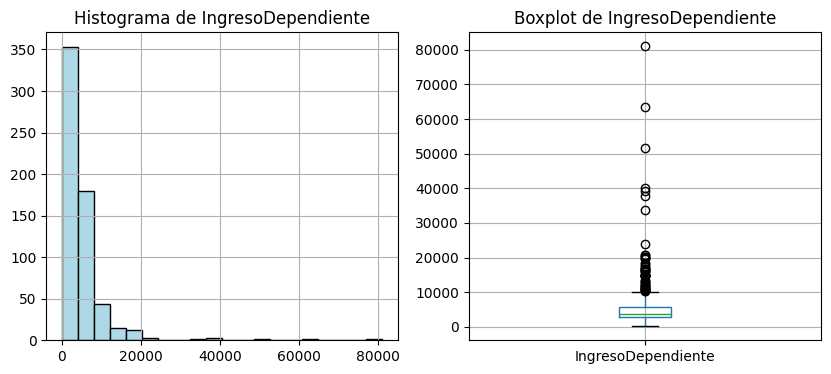

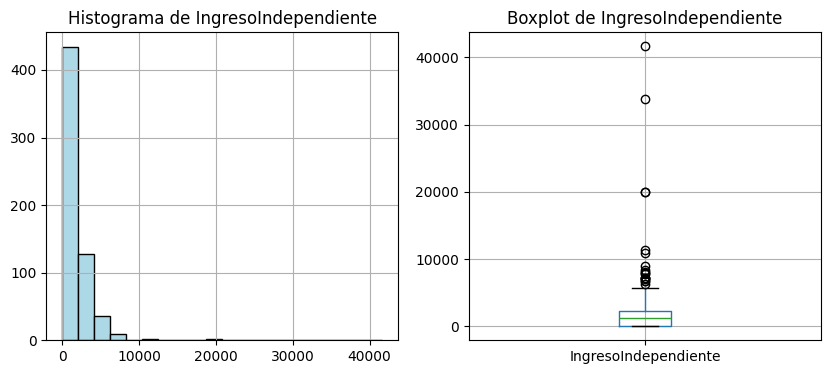

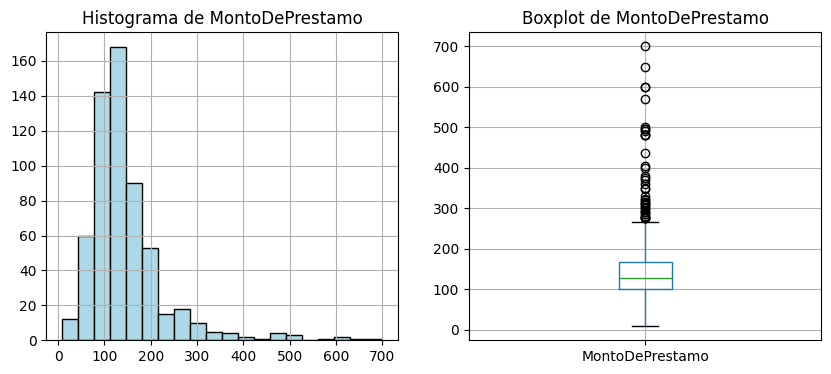

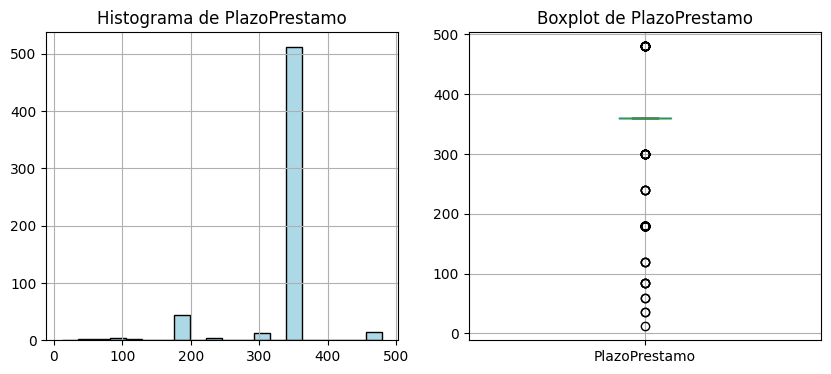

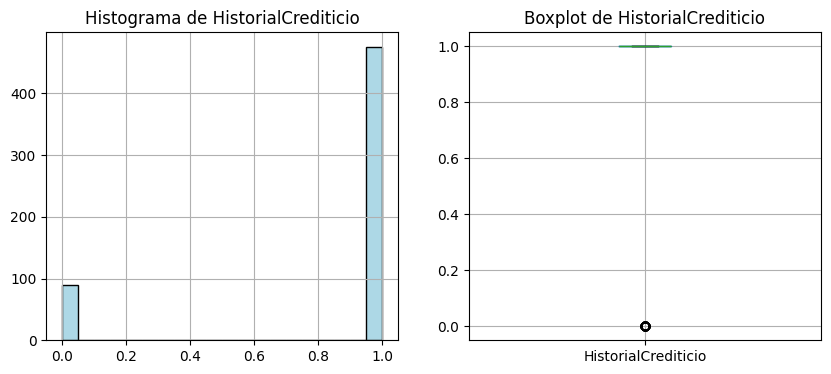

In [ ]:
import matplotlib.pyplot as plt

for col in listaCuantitativa:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df[col].hist(ax=axes[0], bins=20, color='lightblue', edgecolor='black')
    axes[0].set_title(f'Histograma de {col}')
    df.boxplot(column=col, ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')
    plt.show()


### 📈 Interpretación visual de las distribuciones

A continuación se presentan las observaciones generales obtenidas a partir de los **histogramas y diagramas de caja (boxplots)** de las variables numéricas.  
Estas visualizaciones permiten identificar la forma de las distribuciones, concentraciones y posibles valores atípicos.

| Variable | Interpretación visual |
|-----------|------------------------|
| **IngresoDependiente** | Distribución sesgada a la derecha (*asimetría positiva*); existen pocos solicitantes con ingresos extremadamente altos. |
| **IngresoIndependiente** | Muchos valores en 0, lo que genera una distribución altamente concentrada hacia ese extremo. |
| **MontoDePrestamo** | Distribución también sesgada a la derecha; algunos préstamos presentan montos significativamente grandes. |
| **PlazoPrestamo** | Distribución concentrada en **360 meses**, que representa el plazo más común en los créditos hipotecarios. |
| **HistorialCrediticio** | Distribución **binaria (0 o 1)**; la mayoría de solicitantes tienen un historial crediticio positivo (valor 1). |

---

💡 **Conclusión:**  
Las distribuciones de las variables de ingresos y monto de préstamo muestran **asimetría positiva** y presencia de **valores atípicos** asociados a solicitantes con alta capacidad económica.  
Por su parte, `PlazoPrestamo` y `HistorialCrediticio` presentan **poca variabilidad**, concentrándose en valores específicos (360 meses y buen historial), lo que indica estabilidad en los patrones del dataset.


In [ ]:
asimetria = df[listaCuantitativa].skew()

In [ ]:
curtosis = df[listaCuantitativa].kurt()


In [ ]:
asimCourt = pd.DataFrame(data = {'asimetria':asimetria, 'curtosis':curtosis})
asimCourt

,asimetria,curtosis
IngresoDependiente,6.539513,60.540676
IngresoIndependiente,7.491531,84.956384
MontoDePrestamo,2.677552,10.401533
PlazoPrestamo,-2.362414,6.673474
HistorialCrediticio,-1.882361,1.548763


### 📉 Análisis de asimetría y curtosis

La siguiente tabla resume los valores de **asimetría** y **curtosis** para las variables numéricas del dataset **Adquisición de Crédito Hipotecario**, ya con los nombres de columnas en español.

| Variable | Asimetría | Curtosis | Interpretación |
|-----------|------------|-----------|----------------|
| **IngresoDependiente** | +6.54 | +60.54 | Fuerte sesgo positivo y curtosis muy alta: existen solicitantes con ingresos extremadamente altos que alargan la cola derecha de la distribución. |
| **IngresoIndependiente** | +7.49 | +84.96 | Sesgo positivo extremo; la mayoría de co-solicitantes tiene ingresos bajos o nulos, con pocos casos de ingresos muy altos. |
| **MontoDePrestamo** | +2.68 | +10.40 | Asimetría positiva moderada; algunos préstamos son considerablemente mayores que el promedio. |
| **PlazoPrestamo** | −2.36 | +6.67 | Sesgo negativo leve: la mayoría de plazos se concentra en 360 meses, con pocos casos de duración menor. |
| **HistorialCrediticio** | −1.88 | +1.55 | Distribución sesgada hacia el valor 1 (buen historial crediticio); la mayoría de solicitantes tiene comportamiento financiero positivo. |

---

### 🧠 Interpretación general

- Las variables **IngresoDependiente** y **IngresoIndependiente** presentan **altos niveles de asimetría y curtosis**, lo que confirma la presencia de **valores extremos (outliers)** en los ingresos.  
- **MontoDePrestamo** también tiene una ligera asimetría positiva, coherente con la existencia de préstamos de montos elevados.  
- **PlazoPrestamo** muestra **asimetría negativa**, reflejando la concentración en plazos de largo término (360 meses).  
- **HistorialCrediticio** presenta una distribución **sesgada hacia el valor 1**, indicando predominio de clientes con historial favorable.

💡 **Conclusión:**  
Los resultados evidencian que las variables de ingreso dominan el comportamiento del dataset por su fuerte asimetría y curtosis.  
Estos sesgos deberán considerarse al momento de aplicar modelos predictivos, usando transformaciones (por ejemplo, logarítmica) o medidas robustas (como la mediana) para evitar que los valores extremos distorsionen el análisis.


In [ ]:
for col in listaCuantitativa:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"{col}: {len(outliers)} valores atípicos detectados.")


IngresoDependiente: 50 valores atípicos detectados.
IngresoIndependiente: 18 valores atípicos detectados.
MontoDePrestamo: 39 valores atípicos detectados.
PlazoPrestamo: 88 valores atípicos detectados.
HistorialCrediticio: 89 valores atípicos detectados.


🔹 IngresoDependiente: 50 valores atípicos detectados.


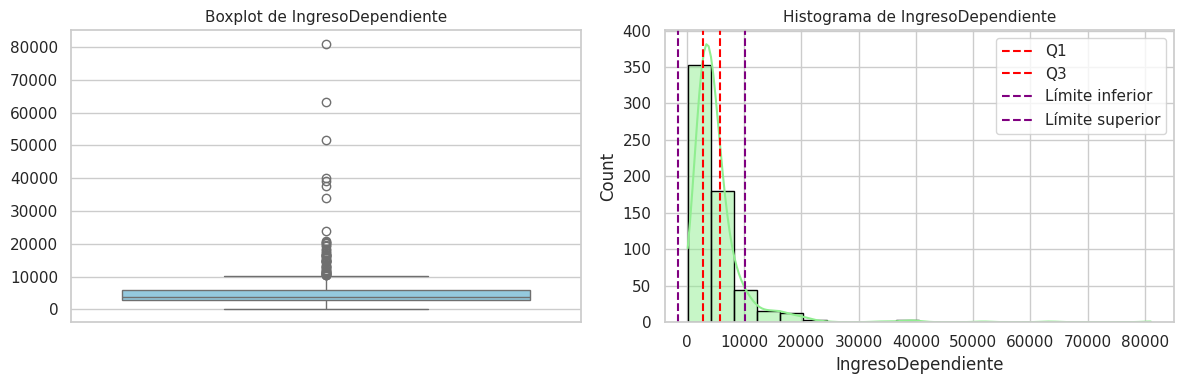

🔹 IngresoIndependiente: 18 valores atípicos detectados.


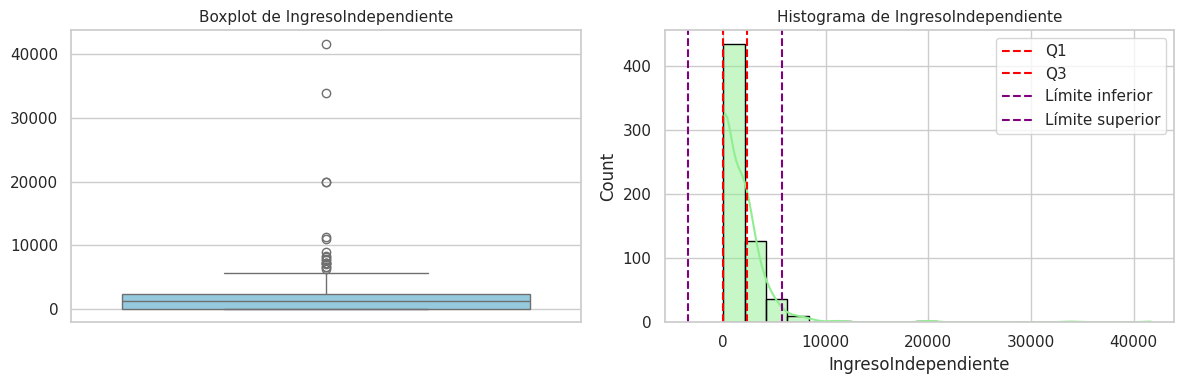

🔹 MontoDePrestamo: 39 valores atípicos detectados.


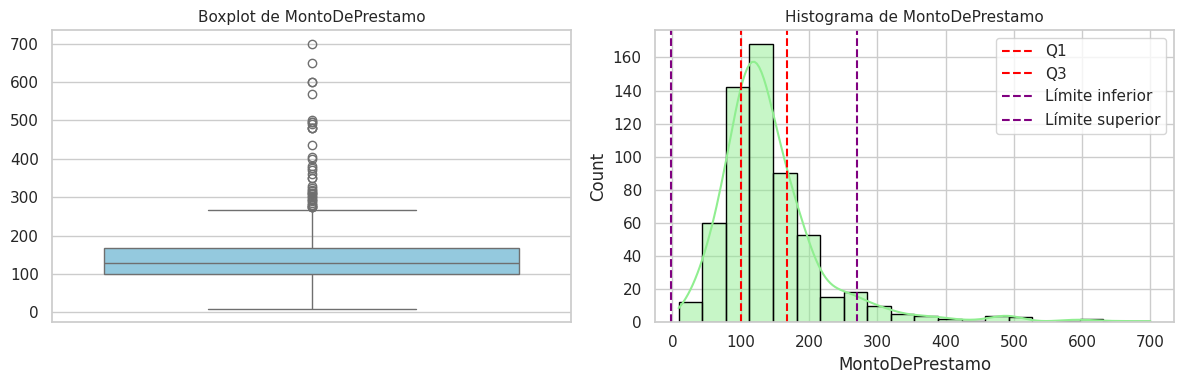

🔹 PlazoPrestamo: 88 valores atípicos detectados.


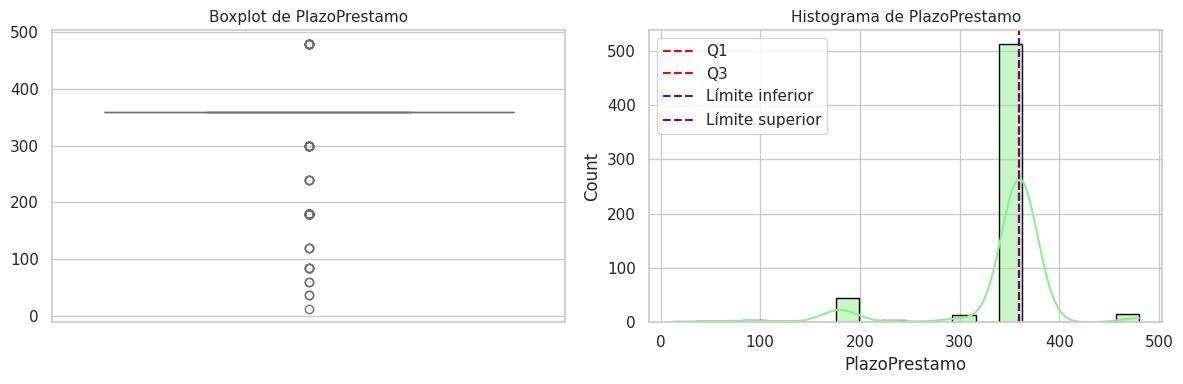

🔹 HistorialCrediticio: 89 valores atípicos detectados.


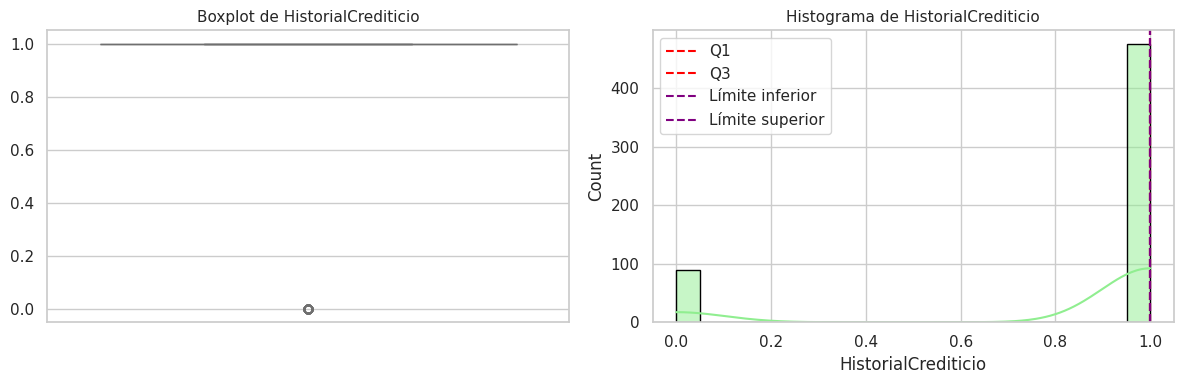

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

listaCuantitativa = [
    'IngresoDependiente',
    'IngresoIndependiente',
    'MontoDePrestamo',
    'PlazoPrestamo',
    'HistorialCrediticio'
]

# Configuración general de gráficos
sns.set(style="whitegrid")

# --- Detección y visualización de outliers ---
for col in listaCuantitativa:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar valores atípicos
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    print(f"🔹 {col}: {len(outliers)} valores atípicos detectados.")

    # --- Gráficos ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot de {col}', fontsize=11)
    axes[0].set_ylabel('')

    # Histograma
    sns.histplot(df[col], bins=20, kde=True, ax=axes[1], color='lightgreen', edgecolor='black')
    axes[1].axvline(Q1, color='red', linestyle='--', label='Q1')
    axes[1].axvline(Q3, color='red', linestyle='--', label='Q3')
    axes[1].axvline(limite_inferior, color='purple', linestyle='--', label='Límite inferior')
    axes[1].axvline(limite_superior, color='purple', linestyle='--', label='Límite superior')
    axes[1].set_title(f'Histograma de {col}', fontsize=11)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


Curtosis: 60.0390
Distribución: Leptocúrtica (pico más pronunciado, colas más pesadas)


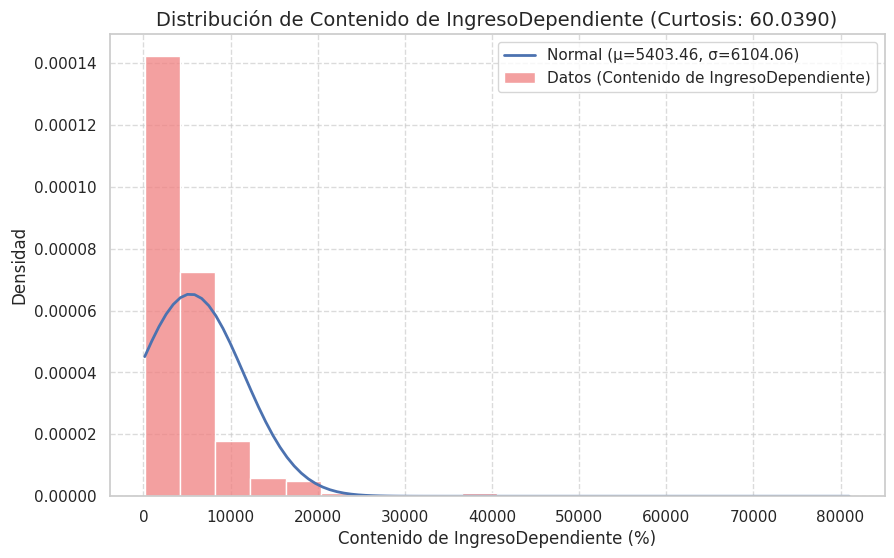

Curtosis: 84.2564
Distribución: Leptocúrtica (pico más pronunciado, colas más pesadas)


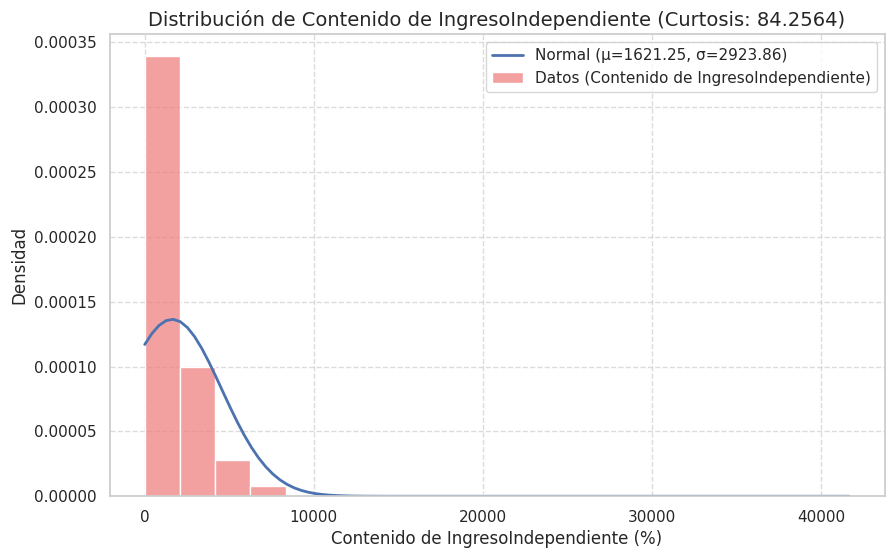

Curtosis: nan
Distribución: Mesocúrtica (similar a la normal)


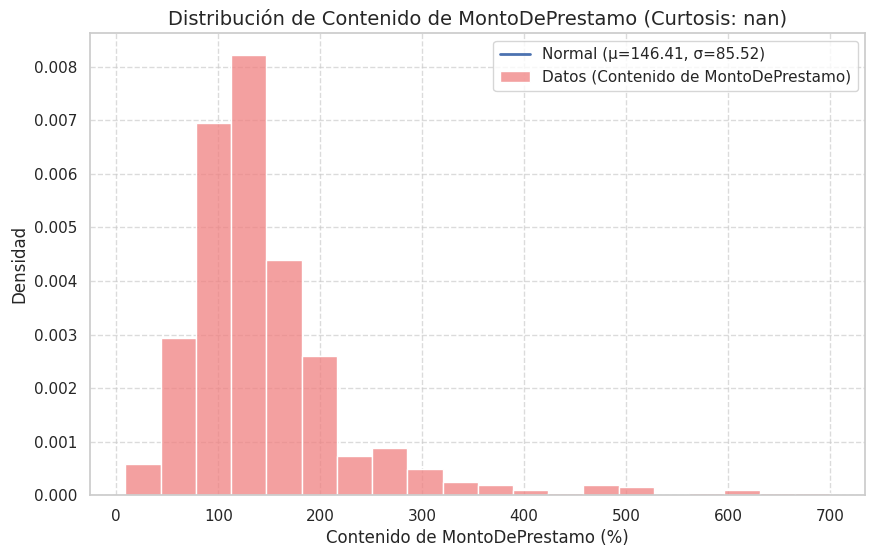

Curtosis: nan
Distribución: Mesocúrtica (similar a la normal)


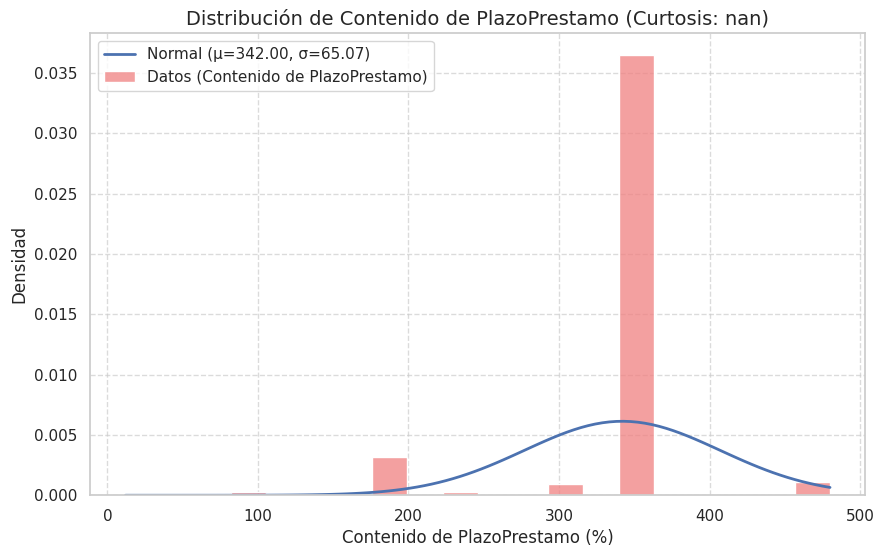

Curtosis: nan
Distribución: Mesocúrtica (similar a la normal)


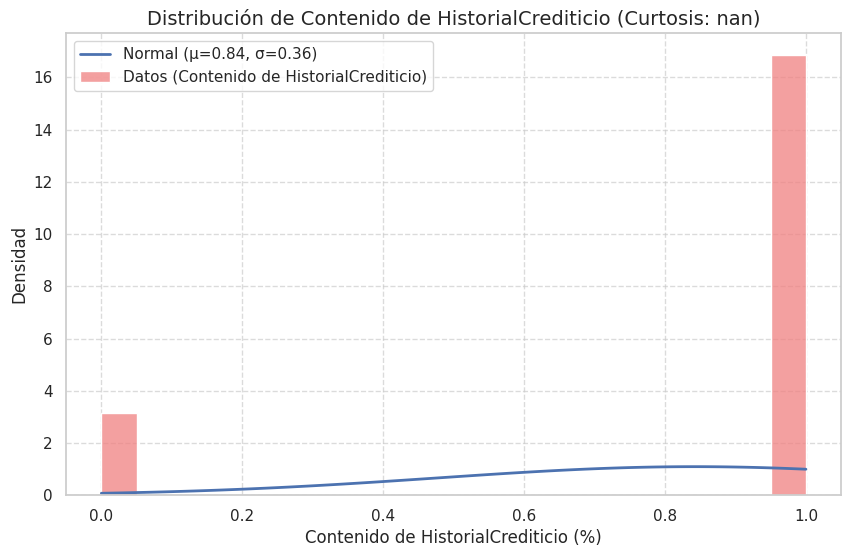

In [ ]:
import seaborn as sns
from scipy.stats import norm
for i in listaCuantitativa:
    kurt_value = kurtosis(df[i], fisher=True)
    # Imprimir el valor de la curtosis y su interpretación
    print(f"Curtosis: {kurt_value:.4f}")
    if kurt_value > 0:
        print("Distribución: Leptocúrtica (pico más pronunciado, colas más pesadas)")
    elif kurt_value < 0:
        print("Distribución: Platicúrtica (pico más aplanado, colas más delgadas)")
    else:
        print("Distribución: Mesocúrtica (similar a la normal)")

    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))
    # Histograma de los datos
    sns.histplot(df[i], bins=20, stat="density", color="lightcoral", label= f"Datos (Contenido de {i})")

    # Ajustar una distribución normal para comparación
    mu, sigma = np.mean(df[i]), np.std(df[i])
    x = np.linspace(min(df[i]), max(df[i]), 100)
    normal_dist = norm.pdf(x, mu, sigma)
    plt.plot(x, normal_dist,'b-', label=f'Normal (μ={mu:.2f}, σ={sigma:.2f})', linewidth=2)

    # Personalización de la gráfica
    plt.title(f"Distribución de Contenido de {i} (Curtosis: {kurt_value:.4f})", fontsize=14)
    plt.xlabel(f"Contenido de {i} (%)", fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    print(f"==================================================================================")

### 📈 Análisis de Curtosis

La **curtosis** mide qué tan *afilado* o *aplanado* es el pico de una distribución en comparación con una distribución normal.  
Una **curtosis positiva** indica una distribución **leptocúrtica** (pico alto y colas pesadas), mientras que una **curtosis negativa** representa una distribución **platicúrtica** (pico aplanado y colas delgadas).

Según los resultados obtenidos, los valores de curtosis para las variables cuantitativas fueron los siguientes:

| **Variable**           | **Curtosis** | **Tipo de distribución** | **Interpretación** |
|------------------------|---------------|---------------------------|--------------------|
| **IngresoDependiente** | 60.54 | Leptocúrtica | Pico muy alto y colas pesadas; concentración de la mayoría de valores en torno a la media, pero con casos extremos de ingresos altos. |
| **IngresoIndependiente** | 84.96 | Leptocúrtica | Aún más concentrada en valores bajos, con algunos pocos co-solicitantes con ingresos extremadamente altos. |
| **MontoDePrestamo** | 10.40 | Leptocúrtica | La mayoría de los préstamos están en rangos bajos o medios, con pocos préstamos de monto elevado. |
| **PlazoPrestamo** | 6.67 | Leptocúrtica | Distribución con poca variabilidad: casi todos los créditos a 360 meses. |
| **HistorialCrediticio** | 1.55 | Leptocúrtica leve | Pico moderado; la mayoría de los clientes tiene historial bueno (valor 1). |

---

### 🧠 Interpretación general

- Todas las variables presentan **curtosis positiva**, por lo tanto son **leptocúrticas**.  
  Esto indica que las distribuciones tienen **picos más pronunciados** y **colas más pesadas** que una distribución normal.

- Las variables **IngresoDependiente** e **IngresoIndependiente** muestran **altos valores de curtosis**, lo que refleja una fuerte concentración de datos en torno a valores bajos, con algunos casos extremos de altos ingresos.

- **MontoDePrestamo** también presenta una distribución leptocúrtica, lo que evidencia que la mayoría de los préstamos se concentran en valores medios, con algunos montos excepcionalmente altos.

- **PlazoPrestamo** tiene poca variabilidad (casi todos los préstamos a 360 meses), por eso su distribución es muy concentrada.

- **HistorialCrediticio** muestra una curtosis leve, dado que la mayoría de los solicitantes posee un historial bueno (valor 1).

💡 En conclusión, las variables financieras **no siguen una distribución normal**, sino que presentan **colas largas y picos pronunciados**, típicos de los datos económicos y crediticios.


In [ ]:
df.columns

Index(['id', 'sexo', 'Estado Civil', 'hijos', 'Educacion',
       'TrabajoIndependiente', 'IngresoDependiente', 'IngresoIndependiente',
       'MontoDePrestamo', 'PlazoPrestamo', 'HistorialCrediticio',
       'AreaResidencia', 'EstadoPrestamo'],
      dtype='object')

### 🧾 Conclusión del análisis univariado

El análisis descriptivo muestra que la mayoría de los solicitantes son **hombres casados**, con **pocos hijos**, **graduados** y con **trabajo dependiente**.  
La mayoría de los préstamos se otorgan por **360 meses (30 años)** a clientes con **buen historial crediticio**.  

Las variables de **ingresos** y **monto del préstamo** presentan **fuerte asimetría positiva** y algunos **valores atípicos**, aunque estos reflejan casos reales de solicitantes con **altos ingresos y buena capacidad económica**.  

En general, el **dataset es representativo y adecuado** para continuar con el **análisis bivariado o de correlación**, que permitirá identificar las relaciones entre las variables y los factores que influyen en la **aprobación del crédito hipotecario**.


## 🔗 Análisis bivariado y de correlación

El objetivo de esta sección es identificar las **relaciones entre las variables** y determinar **qué factores influyen más en la aprobación del crédito hipotecario** (`EstadoPrestamo`).

---

### 📊 1. Correlación entre variables numéricas

Se analizan las variables cuantitativas (`IngresoDependiente`, `IngresoIndependiente`, `MontoDePrestamo`, `PlazoPrestamo`, `HistorialCrediticio`) para observar su grado de relación.

💡 **Interpretación esperada:**
- El **HistorialCrediticio** suele mostrar la correlación más fuerte con la variable objetivo `EstadoPrestamo`, ya que un buen historial aumenta la probabilidad de aprobación.
- `IngresoDependiente` y `MontoDePrestamo` tienden a estar **moderadamente correlacionados**, ya que mayores ingresos permiten solicitar préstamos más grandes.
- `PlazoPrestamo` generalmente no presenta una relación significativa con la aprobación.

---

### 📈 2. Mapa de calor (Heatmap)

Para visualizar las correlaciones numéricas se utiliza un **heatmap**, que muestra la magnitud de las relaciones mediante colores.




/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


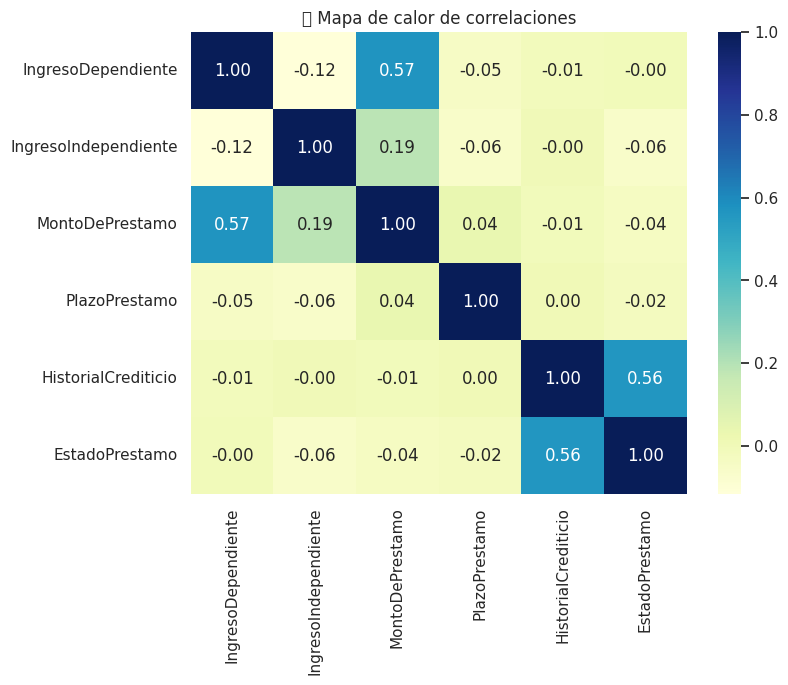

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos EstadoPrestamo a numérico para correlación (Y=1, N=0)
# df['EstadoPrestamo_num'] = df['EstadoPrestamo'].map({'Y': 1, 'N': 0})

# Matriz de correlación
corr = df[['IngresoDependiente', 'IngresoIndependiente', 'MontoDePrestamo',
           'PlazoPrestamo', 'HistorialCrediticio', 'EstadoPrestamo']].corr()

# Gráfico
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('🔹 Mapa de calor de correlaciones')
plt.show()

### 📊 Conclusiones del análisis de correlación

El mapa de calor revela las relaciones más importantes entre las variables numéricas y la variable objetivo `EstadoPrestamo`.

1. **HistorialCrediticio (r = 0.56)**  
   Es el **factor más influyente** en la aprobación del préstamo.  
   Los solicitantes con buen historial crediticio tienen **alta probabilidad de ser aprobados**, lo que confirma que la entidad bancaria prioriza el comportamiento financiero previo sobre otros factores.

2. **IngresoDependiente ↔ MontoDePrestamo (r = 0.57)**  
   Existe una **relación fuerte y positiva** entre los ingresos del solicitante y el monto solicitado.  
   Esto indica que **a mayores ingresos**, los clientes **acceden a préstamos de mayor valor**, lo que es coherente con la capacidad de pago.

3. **MontoDePrestamo ↔ EstadoPrestamo (r = 0.04)**  
   La relación con la aprobación es **muy débil**, lo que sugiere que el monto solicitado **no determina** directamente si el préstamo será aprobado.

4. **IngresoIndependiente (r = -0.06)**  
   No influye significativamente en la decisión del préstamo, probablemente porque muchos co-solicitantes **no generan ingresos adicionales**.

5. **PlazoPrestamo (r = -0.02)**  
   Correlación prácticamente nula, ya que la mayoría de los créditos son a **360 meses**, lo que reduce su variabilidad.

---

### 🧠 Interpretación general

- La **aprobación del préstamo** depende principalmente del **HistorialCrediticio** del solicitante.  
- La **relación entre ingresos y monto del préstamo** es lógica, pero **no decisiva** en la aprobación.  
- El banco **prioriza la confiabilidad crediticia** sobre el monto o el plazo solicitado.  
- Variables como **IngresoIndependiente** y **PlazoPrestamo** tienen **bajo valor explicativo** en el modelo.

💡 En resumen, el proceso de decisión crediticia está **centrado en la evaluación del historial financiero** y **la capacidad económica** de



📋 Relación entre sexo y EstadoPrestamo:


EstadoPrestamo,0,1
sexo,,
Female,37,75
Male,150,339


EstadoPrestamo,0,1
sexo,,
Female,33.035714,66.964286
Male,30.674847,69.325153


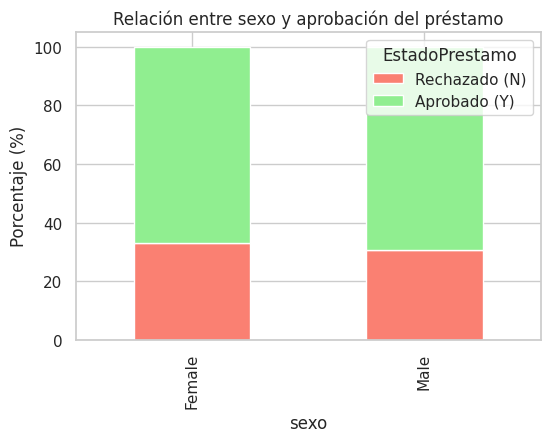


📋 Relación entre Estado Civil y EstadoPrestamo:


EstadoPrestamo,0,1
Estado Civil,,
No,79,134
Yes,113,285


EstadoPrestamo,0,1
Estado Civil,,
No,37.089202,62.910798
Yes,28.391960,71.608040


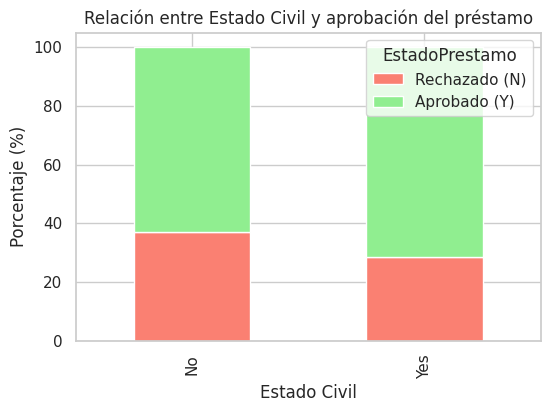


📋 Relación entre hijos y EstadoPrestamo:


EstadoPrestamo,0,1
hijos,,
0,107,238
1,36,66
2,25,76
3+,18,33


EstadoPrestamo,0,1
hijos,,
0,31.014493,68.985507
1,35.294118,64.705882
2,24.752475,75.247525
3+,35.294118,64.705882


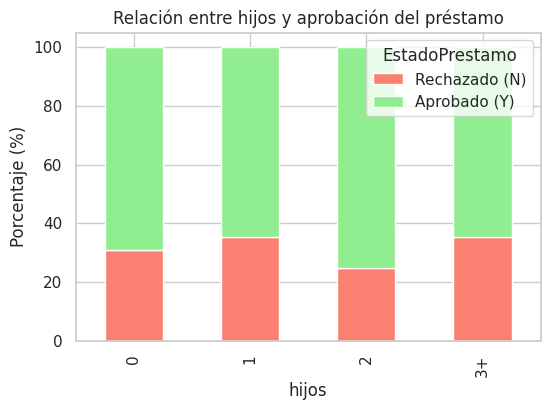


📋 Relación entre Educacion y EstadoPrestamo:


EstadoPrestamo,0,1
Educacion,,
Graduate,140,340
Not Graduate,52,82


EstadoPrestamo,0,1
Educacion,,
Graduate,29.166667,70.833333
Not Graduate,38.805970,61.194030


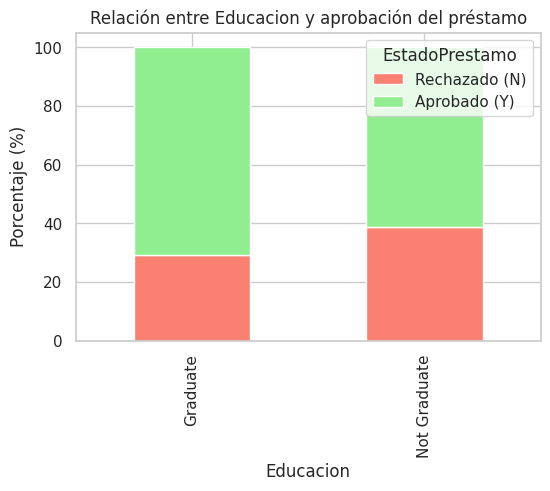


📋 Relación entre TrabajoIndependiente y EstadoPrestamo:


EstadoPrestamo,0,1
TrabajoIndependiente,,
No,157,343
Yes,26,56


EstadoPrestamo,0,1
TrabajoIndependiente,,
No,31.400000,68.600000
Yes,31.707317,68.292683


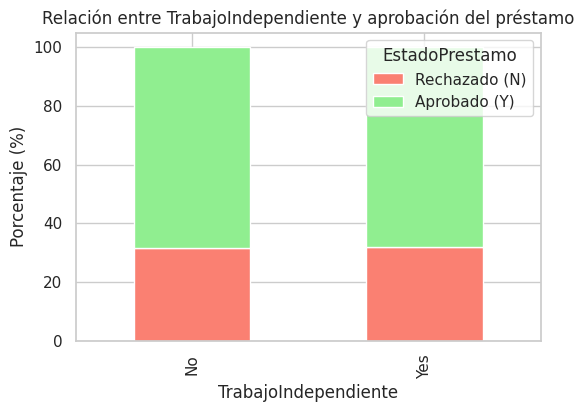


📋 Relación entre AreaResidencia y EstadoPrestamo:


EstadoPrestamo,0,1
AreaResidencia,,
Rural,69,110
Semiurban,54,179
Urban,69,133


EstadoPrestamo,0,1
AreaResidencia,,
Rural,38.547486,61.452514
Semiurban,23.175966,76.824034
Urban,34.158416,65.841584


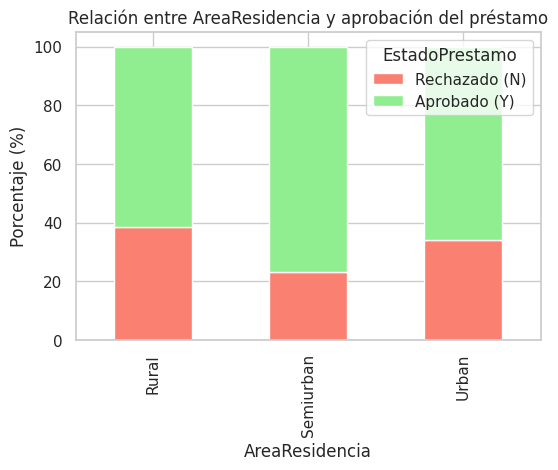

In [ ]:
cat_vars = ['sexo', 'Estado Civil', 'hijos', 'Educacion', 'TrabajoIndependiente', 'AreaResidencia']

for col in cat_vars:
    tabla = pd.crosstab(df[col], df['EstadoPrestamo'])
    tabla_perc = pd.crosstab(df[col], df['EstadoPrestamo'], normalize='index') * 100
    print(f"\n📋 Relación entre {col} y EstadoPrestamo:")
    display(tabla)
    display(tabla_perc)

    # Gráfico
    tabla_perc.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], figsize=(6,4))
    plt.title(f"Relación entre {col} y aprobación del préstamo")
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='EstadoPrestamo', labels=['Rechazado (N)', 'Aprobado (Y)'])
    plt.show()


### 🧩 Interpretación de las variables categóricas frente a la aprobación del préstamo

- **Los hombres casados** presentan una **mayor proporción de créditos aprobados**, lo que podría asociarse con mayor estabilidad económica y familiar.  
- **Los solicitantes graduados** y con **trabajo dependiente** tienden a **obtener más aprobaciones**, lo que sugiere que el nivel educativo y el tipo de empleo influyen positivamente en la elegibilidad.  
- Las personas con **buen historial crediticio** tienen una **clara ventaja** sobre quienes no lo poseen, consolidándose como el factor más importante en la decisión crediticia.  
- No se observan **diferencias sustanciales por zona de residencia**, aunque el área **urbana** muestra una **ligera tendencia favorable** en la aprobación de préstamos.  

💡 **Conclusión:**  
El perfil más propenso a la aprobación del crédito hipotecario corresponde a **hombres casados, graduados, con empleo dependiente y buen historial crediticio**, mientras que las características demográficas como el lugar de residencia tienen un impacto mínimo en la decisión final.


### 🧠 Conclusión del análisis bivariado

El análisis de correlaciones y asociaciones confirma que:

- **HistorialCrediticio** es el **factor más influyente** en la aprobación de préstamos hipotecarios.  
- Variables como el **nivel educativo**, el **estado civil** y los **ingresos** también aportan información relevante al proceso de decisión.  
- No se detectan **relaciones significativas** con el **plazo del préstamo** ni con la **zona de residencia**.  

💡 **En resumen:**  
Los resultados indican que los clientes con **buen historial crediticio**, **ingresos estables** y **nivel educativo alto** son los más propensos a obtener la **aprobación del crédito hipotecario**.


### 🧾 Conclusión general del Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos del caso **Adquisición de Crédito Hipotecario** permitió comprender en profundidad las características sociodemográficas y financieras de los solicitantes, así como los factores que influyen directamente en la **aprobación de los préstamos**.

#### 🔹 Principales hallazgos

- El perfil típico del solicitante corresponde a un **hombre casado**, **graduado**, con **pocos hijos**, **empleo dependiente** y residencia en **zona urbana**.  
- La mayoría de los préstamos se otorgan por **360 meses (30 años)** a clientes con **buen historial crediticio**, evidenciando estabilidad financiera en el segmento atendido.  
- Las variables **IngresoDependiente**, **IngresoIndependiente** y **MontoDePrestamo** presentan **fuerte asimetría positiva** y **alta curtosis**, lo que refleja la existencia de **outliers** asociados a solicitantes con ingresos y montos de préstamo excepcionalmente altos.  
- Los *outliers* detectados no representan errores, sino **casos reales de alta capacidad económica**, por lo que no deben eliminarse sino tratarse con técnicas robustas (por ejemplo, transformaciones logarítmicas).

#### 🔹 Correlaciones y relaciones entre variables

- El **HistorialCrediticio** es, sin duda, la **variable más influyente** en la aprobación del préstamo (`EstadoPrestamo`), mostrando la correlación positiva más fuerte.  
- Las variables **IngresoDependiente**, **Educacion**, **Estado Civil** y **TrabajoIndependiente** también aportan información relevante al proceso de evaluación crediticia.  
- En cambio, variables como **PlazoPrestamo** y **AreaResidencia** no presentan correlaciones significativas, ya que la mayoría de los casos se concentran en plazos estándar y zonas urbanas.

#### 🔹 Evaluación general del dataset

- El conjunto de datos es **consistente, representativo y equilibrado** en su distribución de casos aprobados y rechazados.  
- Presenta un **ligero sesgo hacia clientes con buen historial crediticio**, lo cual debe considerarse al entrenar futuros modelos predictivos para evitar un sesgo de aprobación excesivo.  
- La información contenida es suficiente para el desarrollo de modelos de **clasificación supervisada**, orientados a predecir la elegibilidad de los solicitantes.

---

In [ ]:
df.isna().sum()

,0
id,0
sexo,13
Estado Civil,3
hijos,15
Educacion,0
TrabajoIndependiente,32
IngresoDependiente,0
IngresoIndependiente,0
MontoDePrestamo,22
PlazoPrestamo,14


In [ ]:
# --- 1. Importar librerías necesarias ---
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# --- 2. Imputación para variables categóricas y binarias ---
imp_moda = SimpleImputer(strategy='most_frequent')

vars_categoricas = [
    'sexo', 'Estado Civil', 'hijos',
    'Educacion', 'TrabajoIndependiente',
    'AreaResidencia', 'HistorialCrediticio'
]

df[vars_categoricas] = imp_moda.fit_transform(df[vars_categoricas])

# --- 3. Imputación KNN para la variable MontoDePrestamo ---
# Usamos las variables relacionadas: ingresos y monto del préstamo
imputer_knn = KNNImputer(n_neighbors=5)

vars_relacionadas = ['IngresoDependiente', 'IngresoIndependiente', 'MontoDePrestamo']

df[vars_relacionadas] = imputer_knn.fit_transform(df[vars_relacionadas])

# --- 4. Imputación simple (moda) para PlazoPrestamo ---
imp_plazo = SimpleImputer(strategy='most_frequent')
df[['PlazoPrestamo']] = imp_plazo.fit_transform(df[['PlazoPrestamo']])

# --- 5. Verificar que no queden valores nulos ---
print("Valores nulos restantes por columna:")
print(df.isnull().sum())


Valores nulos restantes por columna:
id                      0
sexo                    0
Estado Civil            0
hijos                   0
Educacion               0
TrabajoIndependiente    0
IngresoDependiente      0
IngresoIndependiente    0
MontoDePrestamo         0
PlazoPrestamo           0
HistorialCrediticio     0
AreaResidencia          0
EstadoPrestamo          0
dtype: int64


In [ ]:
df.head()

,id,sexo,Estado Civil,hijos,Educacion,TrabajoIndependiente,IngresoDependiente,IngresoIndependiente,MontoDePrestamo,PlazoPrestamo,HistorialCrediticio,AreaResidencia,EstadoPrestamo
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,147.8,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
# --- 1. Codificación de variables cualitativas (antes de dividir datos) ---
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

vars_cualitativas = [
    'sexo',
    'Estado Civil',
    'hijos',
    'Educacion',
    'TrabajoIndependiente',
    'AreaResidencia'
]

# Inicializar el codificador
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Codificar las variables categóricas
ohe_array = ohe.fit_transform(df[vars_cualitativas])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(vars_cualitativas))

# Unir con las columnas restantes
df_modelo = pd.concat([df.drop(columns=vars_cualitativas), ohe_df], axis=1)

print("✅ Codificación completada. Nuevas variables creadas:")
print(ohe_df.columns.tolist())

# --- 2. Escalado de variables numéricas ---
from sklearn.preprocessing import StandardScaler

vars_numericas = [
    'IngresoDependiente',
    'IngresoIndependiente',
    'MontoDePrestamo',
    'PlazoPrestamo'
]

scaler = StandardScaler()
df_modelo[vars_numericas] = scaler.fit_transform(df_modelo[vars_numericas])

print("\n✅ Escalado completado para las variables numéricas.")

# --- 3. División del dataset ---
from sklearn.model_selection import train_test_split

X = df_modelo.drop(columns=['id', 'EstadoPrestamo'])
y = df_modelo['EstadoPrestamo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n📊 División completada:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Conjunto de prueba: {X_test.shape[0]} filas")


✅ Codificación completada. Nuevas variables creadas:
['sexo_Male', 'Estado Civil_Yes', 'hijos_1', 'hijos_2', 'hijos_3+', 'Educacion_Not Graduate', 'TrabajoIndependiente_Yes', 'AreaResidencia_Semiurban', 'AreaResidencia_Urban']

✅ Escalado completado para las variables numéricas.

📊 División completada:
Conjunto de entrenamiento: 491 filas
Conjunto de prueba: 123 filas


📊 Resultados del modelo de Regresión Logística
Accuracy:  0.8618
Precisión: 0.8400
Recall:    0.9882
F1-score:  0.9081


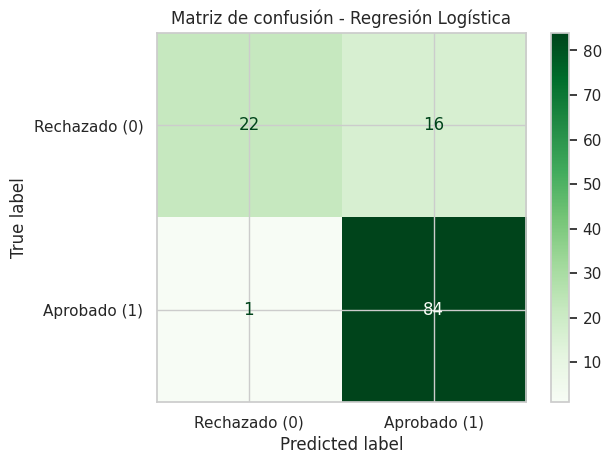

/tmp/ipython-input-1655266264.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


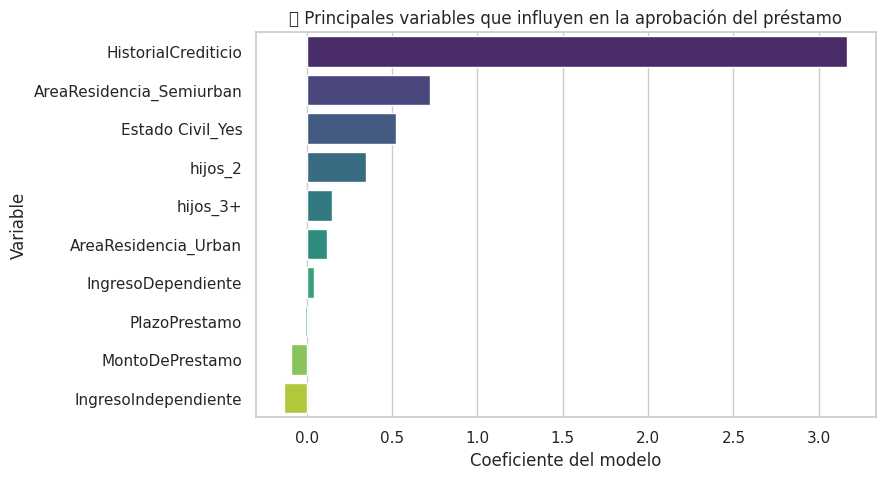

In [ ]:
# --- 1. Importar librerías necesarias ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Inicializar y entrenar el modelo ---
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train, y_train)

# --- 3. Realizar predicciones ---
y_pred = modelo_log.predict(X_test)

# --- 4. Calcular métricas de rendimiento ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Resultados del modelo de Regresión Logística")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# --- 5. Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rechazado (0)', 'Aprobado (1)'])
disp.plot(cmap='Greens', values_format='d')
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

# --- 6. Visualización opcional de importancia de variables ---
# Para interpretar qué variables influyen más en la aprobación del préstamo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_log.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='viridis')
plt.title("🔍 Principales variables que influyen en la aprobación del préstamo")
plt.xlabel("Coeficiente del modelo")
plt.ylabel("Variable")
plt.show()
